# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_triplet import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "logp04"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_6-1_{PROPERTY_NAME.upper()}_pretraining_m20"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             margin=20.,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 201.257  loss_recon_src(tr): 3.453  loss_recon_tar(tr): 3.456  loss_recon_neg(tr): 3.453  loss_kld(tr): 2.170  loss_triplet(tr): 19.736  valid_ratio(va): 0.125  similarity(va): 0.003
[00001000/00100000]  loss(tr): 184.944  loss_recon_src(tr): 0.617  loss_recon_tar(tr): 0.530  loss_recon_neg(tr): 0.630  loss_kld(tr): 18.695  loss_triplet(tr): 16.595
[00002000/00100000]  loss(tr): 171.440  loss_recon_src(tr): 0.561  loss_recon_tar(tr): 0.508  loss_recon_neg(tr): 0.563  loss_kld(tr): 18.541  loss_triplet(tr): 15.263
[00003000/00100000]  loss(tr): 168.628  loss_recon_src(tr): 0.552  loss_recon_tar(tr): 0.493  loss_recon_neg(tr): 0.586  loss_kld(tr): 28.183  loss_triplet(tr): 14.017
[00004000/00100000]  loss(tr): 177.810  loss_recon_src(tr): 0.542  loss_recon_tar(tr): 0.481  loss_recon_neg(tr): 0.550  loss_kld(tr): 24.496  loss_triplet(tr): 15.305
[00005000/00100000]  loss(tr): 157.332  loss_recon_src(tr): 0.579  loss_recon_tar(tr): 0.503  loss_recon_neg(tr): 

[00048000/00100000]  loss(tr): 150.915  loss_recon_src(tr): 0.431  loss_recon_tar(tr): 0.384  loss_recon_neg(tr): 0.449  loss_kld(tr): 44.459  loss_triplet(tr): 10.624
[00049000/00100000]  loss(tr): 151.073  loss_recon_src(tr): 0.463  loss_recon_tar(tr): 0.423  loss_recon_neg(tr): 0.431  loss_kld(tr): 45.140  loss_triplet(tr): 10.571
[00050000/00100000]  loss(tr): 159.601  loss_recon_src(tr): 0.433  loss_recon_tar(tr): 0.410  loss_recon_neg(tr): 0.427  loss_kld(tr): 42.935  loss_triplet(tr): 11.645  valid_ratio(va): 1.000  similarity(va): 0.129
[00051000/00100000]  loss(tr): 155.605  loss_recon_src(tr): 0.453  loss_recon_tar(tr): 0.415  loss_recon_neg(tr): 0.475  loss_kld(tr): 43.253  loss_triplet(tr): 11.213
[00052000/00100000]  loss(tr): 145.205  loss_recon_src(tr): 0.441  loss_recon_tar(tr): 0.397  loss_recon_neg(tr): 0.447  loss_kld(tr): 45.473  loss_triplet(tr): 9.952
[00053000/00100000]  loss(tr): 140.300  loss_recon_src(tr): 0.435  loss_recon_tar(tr): 0.409  loss_recon_neg(tr): 

[00096000/00100000]  loss(tr): 152.958  loss_recon_src(tr): 0.429  loss_recon_tar(tr): 0.398  loss_recon_neg(tr): 0.452  loss_kld(tr): 44.213  loss_triplet(tr): 10.853
[00097000/00100000]  loss(tr): 146.115  loss_recon_src(tr): 0.437  loss_recon_tar(tr): 0.393  loss_recon_neg(tr): 0.456  loss_kld(tr): 43.991  loss_triplet(tr): 10.191
[00098000/00100000]  loss(tr): 144.405  loss_recon_src(tr): 0.430  loss_recon_tar(tr): 0.394  loss_recon_neg(tr): 0.477  loss_kld(tr): 45.720  loss_triplet(tr): 9.847
[00099000/00100000]  loss(tr): 151.346  loss_recon_src(tr): 0.453  loss_recon_tar(tr): 0.421  loss_recon_neg(tr): 0.440  loss_kld(tr): 41.752  loss_triplet(tr): 10.937
[00100000/00100000]  loss(tr): 154.742  loss_recon_src(tr): 0.421  loss_recon_tar(tr): 0.388  loss_recon_neg(tr): 0.441  loss_kld(tr): 47.955  loss_triplet(tr): 10.658  valid_ratio(va): 1.000  similarity(va): 0.130


## 9. Visualize for loss analysis

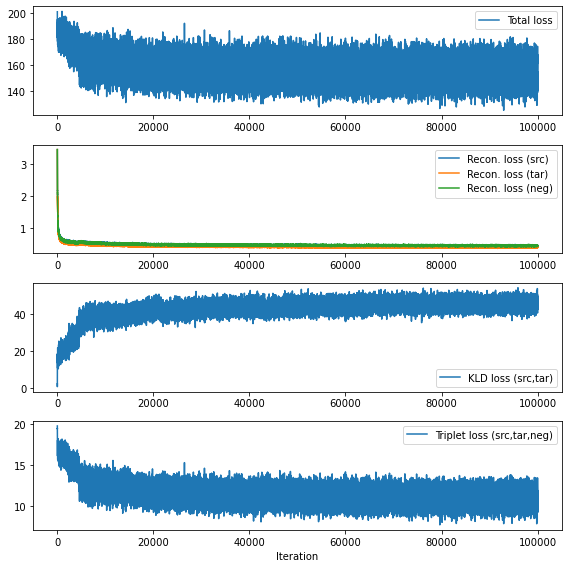

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_TRIPLET"], label="Triplet loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

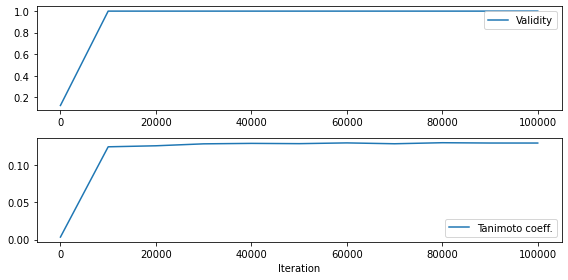

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()